In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from  tensorflow.python import pywrap_tensorflow

In [2]:
import os
print("DIR",os.getcwd())
cur_dir = os.getcwd()
train_path = os.path.join(cur_dir,"Datasets","Train")
test_path = os.path.join(cur_dir,"Datasets","Test")
valid_path = os.path.join(cur_dir,"Datasets","Valid")



DIR c:\Users\vivek\OneDrive\Desktop\Vivek\Off\Projects\Potato


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory( 
    train_path,
    labels = "inferred",
    label_mode= "categorical",
    class_names = None,
    color_mode = "rgb",
    image_size = (128,128),
    shuffle = True,
    interpolation = "bilinear"
)

Found 900 files belonging to 3 classes.


In [4]:
labels = training_set.class_names
print(labels)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels = "inferred",
    label_mode= "categorical",
    color_mode = "rgb",
    image_size = (128,128),
    shuffle = True,
    interpolation = "bilinear"
)



Found 300 files belonging to 3 classes.


In [6]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape = [128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))


C:\Users\vivek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate = 0.0001),loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.3537 - loss: 1.6352 - val_accuracy: 0.5300 - val_loss: 0.9424
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5880 - loss: 0.8495 - val_accuracy: 0.4300 - val_loss: 1.7997
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6116 - loss: 0.8694 - val_accuracy: 0.6933 - val_loss: 0.6043
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.7806 - loss: 0.4856 - val_accuracy: 0.8533 - val_loss: 0.4247
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8404 - loss: 0.3735 - val_accuracy: 0.8467 - val_loss: 0.3670
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8819 - loss: 0.2795 - val_accuracy: 0.8800 - val_loss: 0.3141
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8755 - loss: 0.2810 - val_accuracy: 0.8767 - val_loss: 0.3015
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9294 - loss: 0.1750 - val_accuracy: 0.9133 - val_loss:

In [10]:
train_loss, train_acc = cnn.evaluate(training_set)
train_acc

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.9302 - loss: 0.1599


0.9255555272102356

In [11]:
val_loss, val_acc = cnn.evaluate(validation_set)
val_acc

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - accuracy: 0.9306 - loss: 0.1881


0.9100000262260437

In [12]:
cnn.save('trained_plant_disease_model.keras')

In [13]:
training_history.history

{'accuracy': [0.39222222566604614,
  0.6333333253860474,
  0.653333306312561,
  0.8133333325386047,
  0.8733333349227905,
  0.9100000262260437,
  0.8911111354827881,
  0.945555567741394,
  0.9222221970558167,
  0.9277777671813965],
 'loss': [1.2904051542282104,
  0.7554972171783447,
  0.7442839741706848,
  0.4303659498691559,
  0.30636030435562134,
  0.23640252649784088,
  0.25258585810661316,
  0.14701363444328308,
  0.2020942121744156,
  0.1968139111995697],
 'val_accuracy': [0.5299999713897705,
  0.4300000071525574,
  0.6933333277702332,
  0.8533333539962769,
  0.846666693687439,
  0.8799999952316284,
  0.8766666650772095,
  0.9133333563804626,
  0.8999999761581421,
  0.9100000262260437],
 'val_loss': [0.9424008131027222,
  1.799749732017517,
  0.6042572259902954,
  0.42466577887535095,
  0.3670233190059662,
  0.3141178786754608,
  0.3014998733997345,
  0.19999249279499054,
  0.2515549659729004,
  0.22515620291233063]}

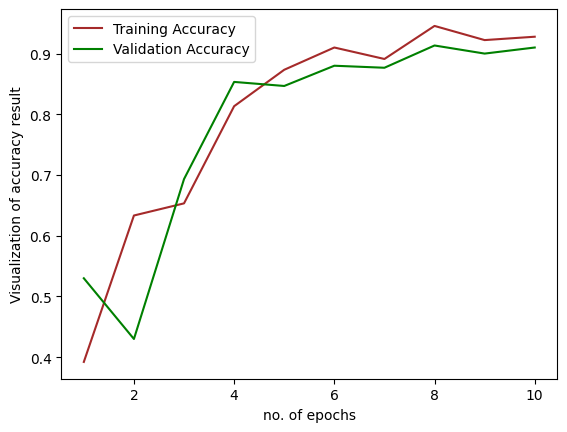

In [14]:
epochs = [ i  for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color = 'brown', label = 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color ='green', label = 'Validation Accuracy')
plt.xlabel("no. of epochs")
plt.ylabel("Visualization of accuracy result")
plt.legend()
plt.show()